NIA Python Bootcamp DAY 3 - Wednesday July 19, 2017

# Day 1 review

1. Python ecosystem of tools
2. Jupyter Notebook is code, output and documentation all in one document
3. Type code into cells, and to run them you press Shift-Enter
4. Different data types for different data
4. Tab completion reduces typing, shows you pop-up menu of all the things you can do with that piece of data
5. Operators take one or more input values and turn them into other values *based on the input values type*
6. Converting data from one type to another using the function syntax, e.g., <code>int()</code>

# Day 2 Review

1. Exploring data types using the <code>TAB</code> key
2. Python syntax for taking slices of iterables
1. NumPy arrays: basic math operations in 1-D and 2-D (e.g., row-wise and column-wise eman)
1. Subselecting based on a boolean criterion
1. Example: Images as 3-D matrices

# Day 3: 
3. PANDAS DataFrames
1. Simple and complex sorting

## PANDAS DataFrame

* pandas = [Python Data Analysis Library](http://pandas.pydata.org/)
* Emulate R's <code>data.frame</code> structure.
* Basically a NumPy matrix with
    * Row and column names
    * Can have columns of different types
    * Handles missing data better

## Load the PANDAS package into memory using <code>import()</code>

In [1]:
import pandas as pd

## Use PANDAS <code>read_*</code> functions to import data

* There are many functions to import data
* Type <code>pd.read_</code> then <code>TAB</code> to see all the import functions

In [ ]:
pd.read_

## Read data from file or URL

In [2]:
titanic_data_url  = "http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"

In [3]:
titanic = pd.read_excel( titanic_data_url )

## Return type is a DataFrame

In [4]:
type(titanic)

pandas.core.frame.DataFrame

## What did we just load?

In [ ]:
titanic

### Change the number of rows Pandas will display using the <code>set_option()</code> function

Use the word <code>None</code> if you want to display all of them.

In [ ]:
pd.set_option( 'display.max_rows', None )

### See the first N rows using <code>.head(N)</code>

Defaults to first 5

In [ ]:
titanic.head()

### See the last N rows using <code>.tail(N)</code>

Defaults to last 5.

In [ ]:
titanic.tail()

### See random N rows using <code>.sample(N)</code>

In [ ]:
titanic.sample(3)

## <code>len()</code> return number of observations (rows)

In [8]:
len(titanic)

1309

## <code>.shape</code> attribute gives the shape

In [9]:
titanic.shape

(1309, 14)

## <code>.describe()</code>: Get basic statistics across all columns

* Detects which columns are quantitative gives descriptive stats for those

In [10]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## <code>.count()</code> give number of non-empty cells

In [11]:
titanic.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

## DataFrame row and column headers

* Like a NumPy array, but with column and row headers.
* Enables slicing by headers, and not just indices like with NumPy arrays
* The collection of row headers is stored in the <code>.index</code> attribute.
* The collection of column headers is stored in the <code>.columns</code> attribute.

In [12]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [13]:
titanic.index

RangeIndex(start=0, stop=1309, step=1)

## Get a single column

Two ways to do it:

1. Use the "object-oriented" style of [API](https://en.wikipedia.org/wiki/Application_programming_interface), i.e., the "dot."
1. Use the <code>dict</code> style, i.e., key-value style (put the column name into brackets, get the column)
2. The returned data type is a PANDAS Series object, which keeps the index from the DataFrame attached

In [ ]:
titanic.age

In [ ]:
titanic['home.dest']

## <code>.value_counts()</code>

In [14]:
titanic.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

## Use <code>.pivot_table()</code> to have a breakdown of the data

### For categorical data, use <code>aggfunc='count'</code>

In [15]:
titanic.pivot_table( values='survived', index='sex', columns='pclass', aggfunc='count', margins=True)

pclass,1,2,3,All
sex,,,,
female,144.0,106.0,216.0,466.0
male,179.0,171.0,493.0,843.0
All,323.0,277.0,709.0,1309.0


### For non-categorical data, can use another statistical measure for aggregation, like mean

In [16]:
titanic.pivot_table( values='age', index='sex', columns='pclass', aggfunc='mean', margins=True)

pclass,1,2,3,All
sex,,,,
female,37.037594,27.499191,22.185307,28.687071
male,41.029250,30.815401,25.962273,30.585233
All,39.159918,29.506705,24.816367,29.881135


## Quick figures

In [17]:
%matplotlib inline

### Univarate histograms

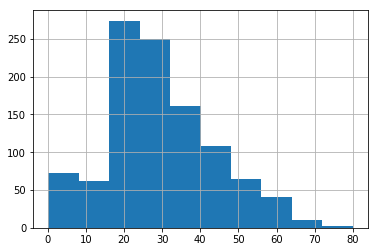

In [18]:
titanic.age.hist()

### Bivariate scatter plot using the <code>.plot</code> attribute

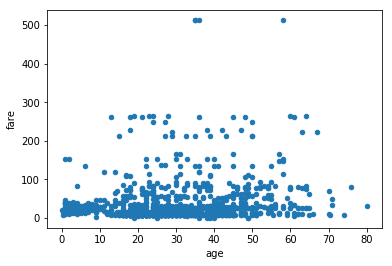

In [19]:
titanic.plot.scatter( 'age', 'fare' )

## Missing data

* Oftentimes, missing data is represented as <code>np.nan</code>, which stands for "Not A Number"
* No missing data representation for an integer

### Using the <code>.dtypes</code> attribute to check data types for each column

Tips

* If an <code>int64</code> (just a fancy int), then probably no missing values in that column, check the <code>.count()</code> to confirm
* If a <code>float64</code> (just a fancy float), then probably missing values in the form of NaN are possible
* If an <code>object</code>, this almost always means it's a string in there, missing values are ""

In [20]:
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

## Stats on a DataFrame are NaN sensitive (unlike NumPy)

* In other words, doesn't count missing values as 0

In [21]:
titanic.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [22]:
titanic.age.describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

## Using the Seaborn Package for visualization

* Browse [this page](https://seaborn.pydata.org/examples/index.html) to see all the types of nice figures you can make

In [23]:
import seaborn as sns

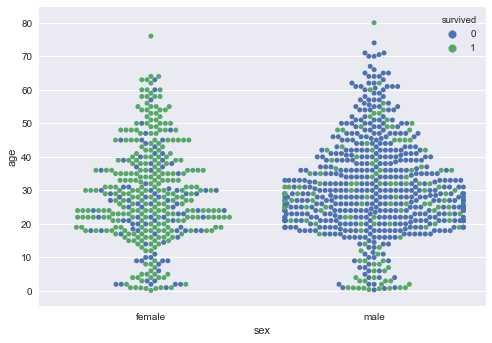

In [24]:
sns.swarmplot( x='sex', y='age', hue='survived', data=titanic )

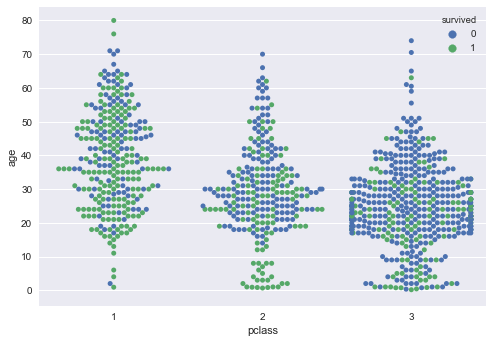

In [25]:
sns.swarmplot( x='pclass', y='age', hue='survived', data=titanic)

## Subselecting based on one of the variables

In [26]:
male = titanic[ titanic.sex == 'male']

In [27]:
female = titanic[ titanic.sex == 'female']

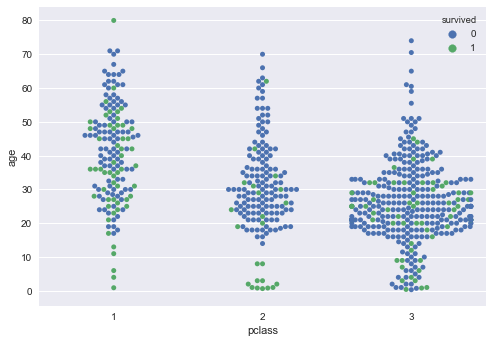

In [28]:
sns.swarmplot( x='pclass', y='age', hue='survived', data=male)

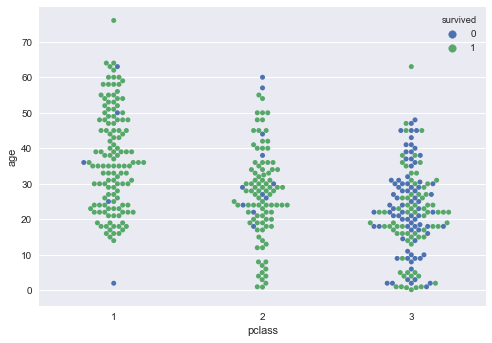

In [29]:
sns.swarmplot( x='pclass', y='age', hue='survived', data=female )

## Slicing by rows and columns using <code>.loc[]</code>

In [30]:
subset = titanic.loc[ titanic.age < 25, ['pclass','age'] ]

In [31]:
len(subset)

409

## Using <code>.sort_values()</code> for simple or complex sorting

In [ ]:
titanic.sort_values?

In [ ]:
titanic.sort_values( by='age').head(10)